In [33]:
import dlib
predictor = dlib.shape_predictor("../models/shape_predictor_v1.dat")

In [34]:
def reconstruct_image(masked_img_path):
    import cv2
    import matplotlib.pyplot as plt
    import urllib
    from PIL import Image
    import numpy as np
    if 'http' in masked_img_path:
        req = urllib.request.urlopen(masked_img_path)
        arr = np.asarray(bytearray(req.read()), dtype=np.uint8)
        img = cv2.imdecode(arr, -1) # 'Load it as it is'
    else:
        img = Image.open(masked_img_path)
        img = img.resize((128,128))
        img.save(masked_img_path.split('.')[0] + '_resize.jpeg')
        img = cv2.imread(masked_img_path.split('.')[0] + '_resize.jpeg')
    
    face = dlib.rectangle(0, 0, img.shape[0], img.shape[1])
    landmarks = predictor(img, face)
    for n in range(0, 68):
        x = landmarks.part(n).x
        y = landmarks.part(n).y
        #landmark_tuple.append((x, y))
        cv2.circle(img, (x, y), 1, (255, 255, 0), -1)
    for i in range(0, 16):
        cv2.line(img, (landmarks.part(i).x, landmarks.part(i).y), (landmarks.part(i+1).x, landmarks.part(i+1).y), (0, 255, 0), 1)
    for i in range(17, 21):
        cv2.line(img, (landmarks.part(i).x, landmarks.part(i).y), (landmarks.part(i+1).x, landmarks.part(i+1).y), (0, 255, 0), 1)
    for i in range(22, 26):
        cv2.line(img, (landmarks.part(i).x, landmarks.part(i).y), (landmarks.part(i+1).x, landmarks.part(i+1).y), (0, 255, 0), 1)
    for i in range(27, 35):
        cv2.line(img, (landmarks.part(i).x, landmarks.part(i).y), (landmarks.part(i+1).x, landmarks.part(i+1).y), (0, 255, 0), 1)
    cv2.line(img, (landmarks.part(30).x, landmarks.part(30).y), (landmarks.part(35).x, landmarks.part(35).y), (0, 255, 0), 1)
    for i in range(36, 41):
        cv2.line(img, (landmarks.part(i).x, landmarks.part(i).y), (landmarks.part(i+1).x, landmarks.part(i+1).y), (0, 255, 0), 1)
    cv2.line(img, (landmarks.part(36).x, landmarks.part(36).y), (landmarks.part(41).x, landmarks.part(41).y), (0, 255, 0), 1)
    for i in range(42, 47):
        cv2.line(img, (landmarks.part(i).x, landmarks.part(i).y), (landmarks.part(i+1).x, landmarks.part(i+1).y), (0, 255, 0), 1)
    cv2.line(img, (landmarks.part(42).x, landmarks.part(42).y), (landmarks.part(47).x, landmarks.part(47).y), (0, 255, 0), 1)
    for i in range(48, 67):
        cv2.line(img, (landmarks.part(i).x, landmarks.part(i).y), (landmarks.part(i+1).x, landmarks.part(i+1).y), (0, 255, 0), 1)
    
    plt.imshow(img)
    plt.show()

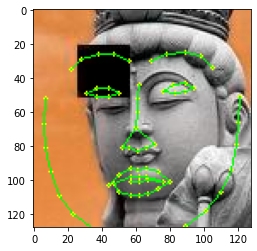

In [36]:
reconstruct_image("/Users/lmontana/Master/deep-statue-inpainting/data/processed/masked_statue_faces_128x128/source_0770-mask_01.jpg")